<a href="https://colab.research.google.com/github/tranquocdienspkt/AIspkt/blob/main/W6_11_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7d2dbed5320741d342c2b4672c5f12facd6260429a5d58eced892b8f2634a34a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

110.25204295731922


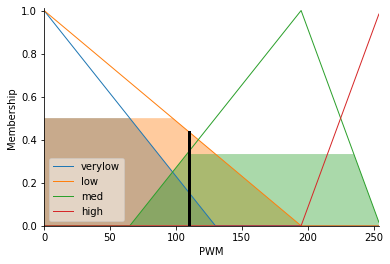

In [24]:
Setpoint    = ctrl.Antecedent(np.arange(18,27,1), 'Setpoint')
Temperature = ctrl.Antecedent(np.arange(0,40,1), 'Temperature')
Humidity    = ctrl.Antecedent(np.arange(30,80,1), 'Humidity')
PWM         = ctrl.Consequent(np.arange(0,255,1), 'PWM')

Temperature['cold'] = fuzz.trimf(Temperature.universe, [0,0,15])
Temperature['cool'] = fuzz.trimf(Temperature.universe, [0,0,20])
Temperature['warm'] = fuzz.trimf(Temperature.universe, [0,20,40])
Temperature['hot'] = fuzz.trimf(Temperature.universe, [20,40,40])

Setpoint['cold'] = fuzz.trimf(Setpoint.universe, [18,18,20])
Setpoint['warm'] = fuzz.trimf(Setpoint.universe, [18,20,27])
Setpoint['hot'] = fuzz.trimf(Setpoint.universe, [24,27,27])

Humidity['low'] = fuzz.trimf(Humidity.universe, [30,30,50])
Humidity['med'] = fuzz.trimf(Humidity.universe, [30,50,80])
Humidity['high'] = fuzz.trimf(Humidity.universe, [50,80,80])

PWM['verylow'] = fuzz.trimf(PWM.universe, [0,0,130])
PWM['low'] = fuzz.trimf(PWM.universe, [0,0,195])
PWM['med'] = fuzz.trimf(PWM.universe, [65,195,255])
PWM['high'] = fuzz.trimf(PWM.universe, [195,255,255])

rule1 = ctrl.Rule(Temperature['cold'] & Humidity['high'] & Setpoint['cold'], PWM['high'])
rule2 = ctrl.Rule(Temperature['cool'] & Humidity['high'] & Setpoint['cold'], PWM['med'])
rule3 = ctrl.Rule(Temperature['warm'] & Humidity['high'] & Setpoint['warm'], PWM['low'])
rule4 = ctrl.Rule(Temperature['hot'] & Humidity['high'] & Setpoint['hot'], PWM['verylow'])

rule5 = ctrl.Rule(Temperature['cold'] & Humidity['med'] & Setpoint['cold'], PWM['med'])
rule6 = ctrl.Rule(Temperature['cool'] & Humidity['med'] & Setpoint['cold'], PWM['low'])
rule7 = ctrl.Rule(Temperature['warm'] & Humidity['med'] & Setpoint['warm'], PWM['verylow'])
rule8 = ctrl.Rule(Temperature['hot'] & Humidity['med'] & Setpoint['hot'], PWM['verylow'])

rule9 = ctrl.Rule(Temperature['cold'] & Humidity['low'] & Setpoint['cold'], PWM['med'])
rule10 = ctrl.Rule(Temperature['cool'] & Humidity['low'] & Setpoint['cold'], PWM['low'])
rule11 = ctrl.Rule(Temperature['warm'] & Humidity['low'] & Setpoint['warm'], PWM['verylow'])
rule12 = ctrl.Rule(Temperature['hot'] & Humidity['low'] & Setpoint['hot'], PWM['verylow'])

PWMCtrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
PWMCtrl = ctrl.ControlSystemSimulation(PWMCtrl)

PWMCtrl.input['Temperature'] = 10
PWMCtrl.input['Setpoint'] = 19
PWMCtrl.input['Humidity'] = 35

PWMCtrl.compute()

print(PWMCtrl.output['PWM'])
PWM.view(sim = PWMCtrl)

In [36]:
L = ctrl.Antecedent(np.arange(0,150,1), 'L')
C = ctrl.Antecedent(np.arange(0,150,1), 'C')
R = ctrl.Antecedent(np.arange(0,150,1), 'R')
LC   = ctrl.Consequent(np.arange(0,90,1), 'LC')
RC   = ctrl.Consequent(np.arange(-90,0,1), 'PWM')
PWM_L  = ctrl.Consequent(np.arange(0,255,1), 'PWM_L')
PWM_R  = ctrl.Consequent(np.arange(0,255,1), 'PWM_L')

L['c']   = fuzz.trimf(L.universe, [0,0,75])
L['med'] = fuzz.trimf(L.universe, [0,75,150])
L['f']   = fuzz.trimf(L.universe, [75,150,150])

C['c']   = fuzz.trimf(C.universe, [0,0,75])
C['med'] = fuzz.trimf(C.universe, [0,75,150])
C['f']   = fuzz.trimf(C.universe, [75,150,150])

R['c']   = fuzz.trimf(R.universe, [0,0,75])
R['med'] = fuzz.trimf(R.universe, [0,75,150])
R['f']   = fuzz.trimf(R.universe, [75,150,150])

LC['s']  = fuzz.trimf(LC.universe, [0,0,45]) 
LC['m']  = fuzz.trimf(LC.universe, [0,45,90]) 
LC['b']  = fuzz.trimf(LC.universe, [45,90,90]) 

RC['b']  = fuzz.trimf(RC.universe, [-90,-90,-45]) 
RC['m']  = fuzz.trimf(RC.universe, [-90,-45,0]) 
RC['s']  = fuzz.trimf(RC.universe, [-45,0,0]) 

PWM_L['low'] = fuzz.trimf(PWM_L.universe, [0,0,125])
PWM_L['med'] = fuzz.trimf(PWM_L.universe, [0,125,255])
PWM_L['f'] = fuzz.trimf(PWM_L.universe, [125,255,255])

PWM_R['low'] = fuzz.trimf(PWM_R.universe, [0,0,125])
PWM_R['med'] = fuzz.trimf(PWM_R.universe, [0,125,255])
PWM_R['f'] = fuzz.trimf(PWM_R.universe, [125,255,255])

rule1 = ctrl.Rule(L['c'] & C['c'], LC['s'])
rule2 = ctrl.Rule(L['med'] & C['c'], LC['s'])
rule3 = ctrl.Rule(L['f'] & C['c'], LC['s'])
rule4 = ctrl.Rule(L['c'] & C['med'], LC['m'])
rule5 = ctrl.Rule(L['med'] & C['med'], LC['m'])
rule6 = ctrl.Rule(L['f'] & C['med'], LC['m'])
rule7 = ctrl.Rule(L['c'] & C['f'], LC['b'])
rule8 = ctrl.Rule(L['med'] & C['f'], LC['m'])

rule9 = ctrl.Rule(R['c'] & C['c'], RC['b'])
rule10 = ctrl.Rule(R['med'] & C['c'], RC['b'])
rule11 = ctrl.Rule(R['f'] & C['c'], RC['b'])
rule12 = ctrl.Rule(R['c'] & C['med'], RC['m'])
rule13 = ctrl.Rule(R['med'] & C['med'], RC['m'])
rule14 = ctrl.Rule(R['f'] & C['med'], RC['m'])
rule15 = ctrl.Rule(R['c'] & C['f'], RC['s'])
rule16 = ctrl.Rule(R['med'] & C['f'], RC['m'])

rule17 = ctrl.Rule(LC['s'], PWM_L['f'] & PWM_R['med'])
rule18 = ctrl.Rule(LC['m'], PWM_L['f'] & PWM_R['med'])
rule19 = ctrl.Rule(LC['b'], PWM_L['med'] & PWM_R['low'])

rule20 = ctrl.Rule(RC['s'], PWM_L['med'] & PWM_R['f'])
rule21 = ctrl.Rule(RC['m'], PWM_L['med'] & PWM_R['f'])
rule22 = ctrl.Rule(RC['b'], PWM_L['low'] & PWM_R['med'])

rule23 = ctrl.Rule(LC['s'] & RC ['s'], PWM_L['f'] & PWM_R['f'])


PWM_Ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                                 rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23])

PWM_Ctrl1 = ctrl.ControlSystemSimulation(PWM_Ctrl)
PWM_Ctrl2 = ctrl.ControlSystemSimulation(PWM_Ctrl)

PWM_Ctrl1.input['L'] = 30
PWM_Ctrl1.input['C'] = 30
PWM_Ctrl1.input['R'] = 255
PWM_Ctrl2.input['L'] = 30
PWM_Ctrl2.input['C'] = 30
PWM_Ctrl2.input['R'] = 255

PWM_Ctrl1.compute()
PWM_Ctrl2.compute()

print(PWM_Ctrl1.output['PWM_R'])
print(PWM_Ctrl2.output['PWM_L'])



ValueError: ignored